In [1]:
push!(LOAD_PATH, joinpath(@__DIR__, ".."))
using Numerik2
using Plots

In [2]:
A = [2.0 0.0 1.0; 1.0 -4.0 1.0; 0.0 -1.0 2.0]
b = [1.0, 4.0, -1.0]
x0 = [1.0, 1.0, 1.0]

x = jacobi(A,b,x0; max_iter=14)
println("---jacobi method---")
println("log||Ax-b|| = $(log10(norm(A*x-b)))")

x = gauss_seidel(A,b,x0; max_iter=14)
println("---gauss seidel method---")
println("log||Ax-b|| = $(log10(norm(A*x-b)))")

---jacobi method---
log||Ax-b|| = -5.447535895440505
---gauss seidel method---
log||Ax-b|| = -15.35252977886304


In [3]:
function plot_conv_speed(M::AbstractArray{T,3}, 
    b::AbstractVector{T}, 
    x0::AbstractVector{T},
    method, r; plot_kwargs...
) where T<:AbstractFloat
    N = size(M,1)
    diff = zeros(Float64, (length(r), N))
    rlim = last(r)
    for i in r
        ds = [norm(M[k,:,:]*method(M[k,:,:], b, x0; max_iter=i) - b) for k in 1:N]
        diff[i,:] = ds
        if any(ds .== zeros(N))
            rlim = i-1
            break
        end
    end
    diff = diff[1:rlim,:]
    return plot(diff, yaxis=:log; plot_kwargs...)
end

function is_diagonally_dominant(A::AbstractMatrix)
    all(2*abs(A[i,i]) >= sum(abs, A[i, 1:end]) for i in 1:size(A,1))
end

is_diagonally_dominant (generic function with 1 method)

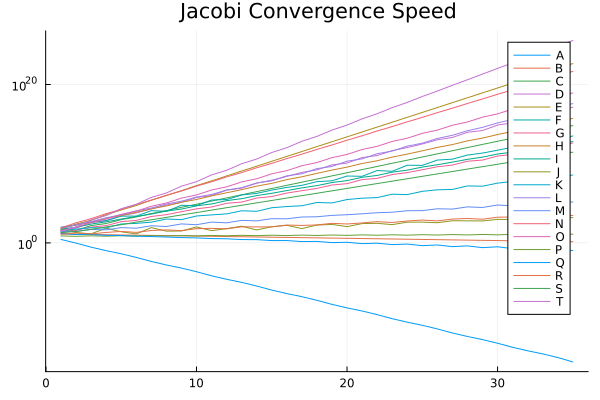

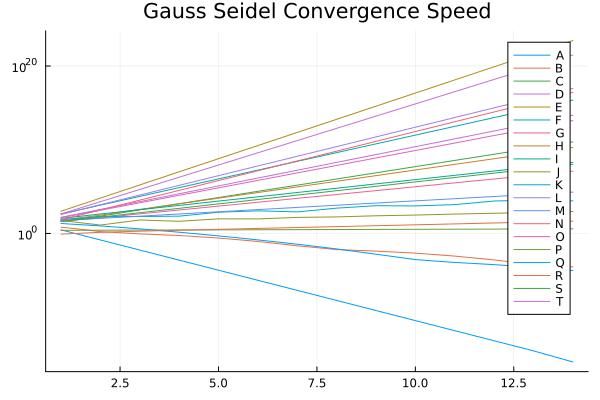

--- Diagonally Dominant ---
A is diagonally dominant.
B is not diagonally dominant.
C is not diagonally dominant.
D is not diagonally dominant.
E is not diagonally dominant.
F is not diagonally dominant.
G is not diagonally dominant.
H is not diagonally dominant.
I is not diagonally dominant.
J is not diagonally dominant.
K is not diagonally dominant.
L is not diagonally dominant.
M is not diagonally dominant.
N is not diagonally dominant.
O is not diagonally dominant.
P is not diagonally dominant.
Q is not diagonally dominant.
R is not diagonally dominant.
S is not diagonally dominant.
T is not diagonally dominant.
--- Spectral Radius ---
ϱ(A) = 3.858
ϱ(B) = 10.323
ϱ(C) = 7.529
ϱ(D) = 9.624
ϱ(E) = 8.469
ϱ(F) = 7.655
ϱ(G) = 7.442
ϱ(H) = 7.565
ϱ(I) = 12.169
ϱ(J) = 10.78
ϱ(K) = 11.929
ϱ(L) = 7.481
ϱ(M) = 9.677
ϱ(N) = 13.839
ϱ(O) = 12.154
ϱ(P) = 12.806
ϱ(Q) = 9.515
ϱ(R) = 14.338
ϱ(S) = 7.932
ϱ(T) = 9.696


In [4]:
N = 20 # amount of random matrices + 1 (predefined Matrix A)

M = Float64.(rand(-10:10, (N,3,3,)))
for i in axes(M,1) for j in axes(M,2)
    # if diagonal element is zero, generate a new one that differs from 0 
    # otherwise the methods would fail and the analysis is pointless
    # alternative: permutation to a nonzero pivot
    if M[i,j,j] == 0
        M[i,j,j] = rand(-1:2:-1)*rand(1:10)
    end
end end
M[1,:,:] = A
b = [1.0, 4.0, -1.0]
x0 = [1.0, 1.0, 1.0]

# get Matrix Names A ... F (or higher)
l = reshape([string(Char(c)) for c in 'A':Char('A' + N - 1)], 1, :)

# plot convergence speed
display(plot_conv_speed(M, b, x0, jacobi, 1:100; 
        label=l, title="Jacobi Convergence Speed"))
display(plot_conv_speed(M, b, x0, gauss_seidel, 1:100; 
        label=l, title="Gauss Seidel Convergence Speed"))
        
# check if diagonal dominant
println("--- Diagonally Dominant ---")
for i in 1:N
    if is_diagonally_dominant(M[i,:,:])
        println("$(l[i]) is diagonally dominant.")
    else
        println("$(l[i]) is not diagonally dominant.")
    end
end

# calculate spectral radius
println("--- Spectral Radius ---")
for i in 1:N
    println("ϱ($(l[i])) = $(round(spectral_radius(M[i,:,:])*10^3)/10^3)")
end